# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Proyek dari sprint 3 yaitu menganalisis iklan kendaraan yang ditayangkan secara gratis pada suatu situs web untuk mengetahui faktor-faktor yang mempengaruhi harga pada sebuah kendaraan. langkah-langkah yang akan dilakukan yaitu:
1. Memuat data
2. Mengeksplorasi data awal
3. Mengatasi nilai-nilai yang hilang
4. Memperbaiki tipe data
5. Memperbaiki kualitas data
6. mempelajari parameter inti
7. Mempelajari dan menangani outlier
8. Mempelajari parameter inti tanpe outlier
9. Mencari masa berlaku iklan
10. Menghitung harga rata-rata setiap jenis kendaraan
11. Mencari faktor-faktor yang mempengaruhi harga
12. kesimpulan

## Pra-pemrosesan

In [238]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt


### Memuat Data

In [239]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [241]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [242]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Kesimpulan dan Langkah-Langkah Selanjutnya


**Berdasarkan informasi yang tertera diatas, terdapat kolom-kolom dengan nilai yang hilang (model_year, cylinders, odometer,paint_color dan is_4wd) dan tipe dari setiap kolom ada beberapa yang tidak sesuai.**

**Terdapat kolom yang memiliki nilai hilang yang paling banyak yaitu pada kolom is_4wd hal ini mungkin terjadi karena kolom is_4wd adalah kolom dengan tipe data kodisi logika atau boolean yang hanya berisi True atau False yang mengartikan kendaraan  memiliki penggerak 4 roda atau tidak, pada data diatas menunjukan nilai 1.0 yang mengartikan True dan yang lainnya yaitu False yang ditunjukan dengan nilai NaN. Langkah awal yang akan saya lakukan yaitu menangani nilai yang hilang pada beberapa kolom dan  memperbaiki tipe data.**

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

[Pelajari nilai yang hilang untuk setiap kolom secara lebih detail dan putuskan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis.]

In [243]:
#cek kolom mana saja yang terdapat nilai yang hilang
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [244]:
#is_4wd

In [245]:
df.is_4wd.describe()

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

In [246]:
df.is_4wd.unique()

array([ 1., nan])

In [247]:
df.is_4wd.isna().sum()

25953

In [248]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [249]:
df.is_4wd.unique()

array([1., 0.])

In [250]:
df.is_4wd.isna().sum()

0

In [251]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [252]:
df.is_4wd.astype(int)

0        1
1        1
2        0
3        0
4        0
        ..
51520    0
51521    0
51522    0
51523    0
51524    0
Name: is_4wd, Length: 51525, dtype: int64

In [253]:
df.loc[df['is_4wd'] == 0, 'is_4wd'] = False
df.loc[df['is_4wd'] == 1, 'is_4wd'] = True
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [254]:
#paint_color

In [255]:
df.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [256]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


**Isi NaN pada paint_color dengan unknown**

In [257]:
grouped_by_model = df.groupby('model').agg({'model_year' : 'median', 'cylinders' : 'median'})
grouped_by_model

,model_year,cylinders
model,,
acura tl,2007.0,6.0
bmw x5,2010.0,6.0
buick enclave,2012.0,6.0
cadillac escalade,2009.0,8.0
chevrolet camaro,2013.0,6.0
...,...,...
toyota sienna,2008.0,6.0
toyota tacoma,2010.0,6.0
toyota tundra,2009.0,8.0


**Pada umumnya jumlah cylinders pada setiap mobil bergantung pada model mobilnya, oleh karena itu NaN pada kolom cylindes mengacu kepada median dari model mobil. Begitu pula sama halnya pada kolom model_year.**

In [258]:
#model_year

In [259]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [260]:
grouped_by_model.loc[grouped_by_model.index == 'bmw x5', 'model_year'][0]

2010.0

In [261]:
for model in df['model'].unique():
    df.loc[(df['model'] == model)& (df['model_year'].isna()), 'model_year'] = \
    grouped_by_model.loc[grouped_by_model.index == model, 'model_year'][0]
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [262]:
#cylinders

In [263]:
for model in df['model'].unique():
    df.loc[(df['model'] == model)& (df['cylinders'].isna()), 'cylinders'] = \
    grouped_by_model.loc[grouped_by_model.index == model, 'cylinders'][0]
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [264]:
#odometer isi berdasarkan condition

**Untuk mengisi NaN pada odometer atau jarak tempuh kendaraan yaitu dilihat berdasarkan kondisi dari setiap mobil. Oleh karena itu kita akan mencari median dari odometer dan agregasikan kepada masing-masing kondisi**

In [265]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [266]:
grouped_by_condition = df.groupby('condition').agg({'odometer' : 'median'})
grouped_by_condition

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [267]:
for condition in df['condition'].unique():
    df.loc[(df['condition'] == condition) & (df['odometer'].isna()), 'odometer'] = \
    grouped_by_condition.loc[grouped_by_condition.index == condition, 'odometer'][0]
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Memperbaiki Tipe Data

In [268]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


In [270]:
df['model_year'] = df['model_year'].astype(int)
df['model_year'].dtypes

dtype('int64')

In [271]:
df['cylinders'] = df['cylinders'].astype(int)
df['cylinders'].dtypes

dtype('int64')

In [272]:
df['odometer'] = df['odometer'].astype(int)
df['odometer'].dtypes

dtype('int64')

In [273]:
df['is_4wd'] = df['is_4wd'].astype(bool)
df['is_4wd'].dtypes

dtype('bool')

In [274]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['date_posted'].dtypes

dtype('<M8[ns]')

In [275]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [276]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Memperbaiki Kualitas Data

In [277]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['year_posted'] = df['date_posted'].dt.year.astype(int)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019


In [278]:
# Tambahkan usia kendaraan saat iklan ditayangkan
#tahun iklan - model year 
df['age'] = df['year_posted']-df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2


In [279]:
df.loc[df['age'] == 0, 'age'] = 1 
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,6
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,6
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,11


In [280]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
#odometer/umur
df['avg_mileage'] = df['odometer']/df['age']
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,6,17362.333333
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,11,13381.000000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Perhitungan `age` sudah bagus.
</div>

In [281]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
df.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [282]:
dict_condition = {'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

In [283]:
df['condition_numeric'] = df['condition'].replace(dict_condition)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000,3


## Memeriksa Data yang Sudah Bersih

In [284]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  age   

In [285]:
# tampilkan sampel data 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000,3


**Data sudah bersih dari NaN dan tipe data sudah diperbaiki**

## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

array([[<AxesSubplot:title={'center':'condition_numeric'}>]], dtype=object)

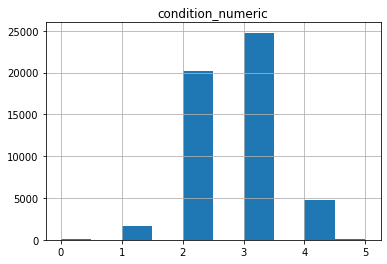

In [286]:
df.hist('condition_numeric')

**Jika dilihat dari data histogram di atas, mobil dengan condition_numeric 3(excellent) dan 2(good) yang paling banyak terjual**

,price
count,51525.000000
mean,12132.464920
std,10040.803015
min,1.000000
25%,5000.000000
50%,9000.000000
75%,16839.000000
max,375000.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

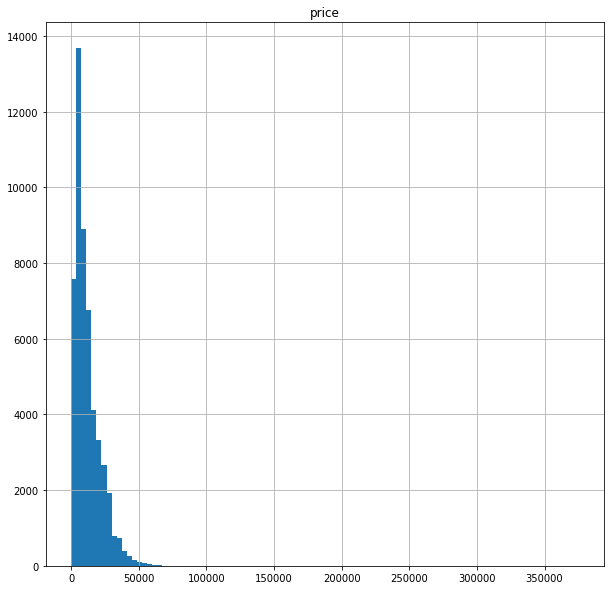

In [287]:
#price
display(df.price.describe().to_frame())
df.hist('price', bins=100, figsize=(10,10))

,age
count,51525.000000
mean,8.555672
std,6.057829
min,1.000000
25%,4.000000
50%,8.000000
75%,12.000000
max,110.000000


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

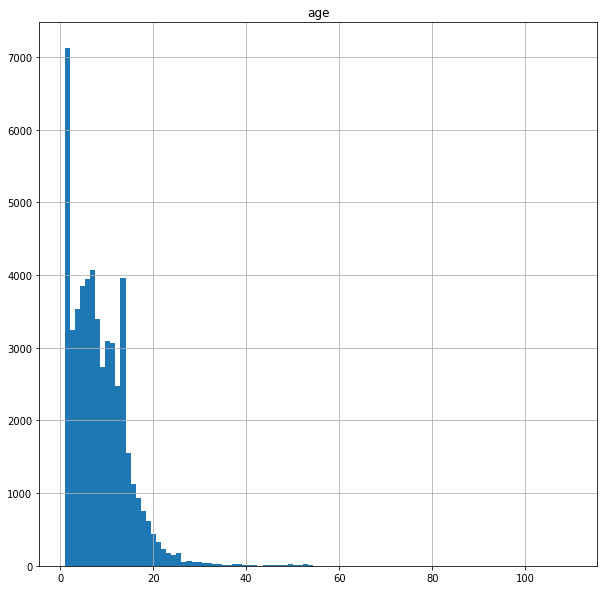

In [288]:
#age
display(df.age.describe().to_frame())
df.hist('age', bins=100, figsize=(10,10))

,odometer
count,51525.000000
mean,115199.007278
std,60484.868232
min,0.000000
25%,75668.000000
50%,110908.000000
75%,147821.000000
max,990000.000000


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

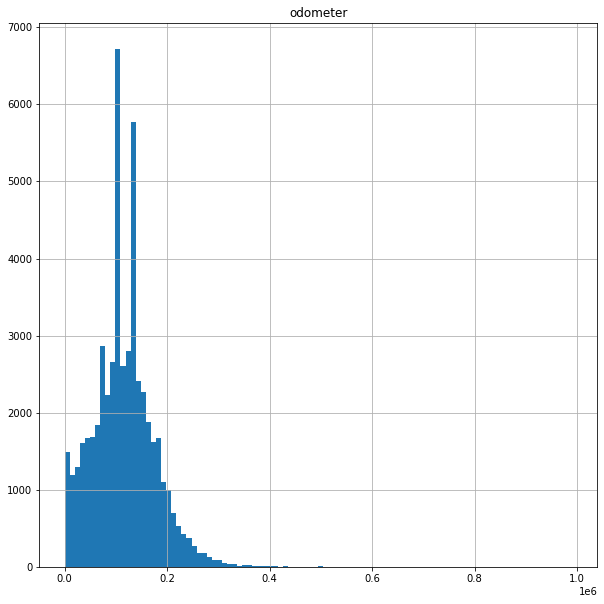

In [289]:
#odometer
display(df.odometer.describe().to_frame())
df.hist('odometer', bins=100, figsize=(10,10))

,cylinders
count,51525.000000
mean,6.121067
std,1.657457
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

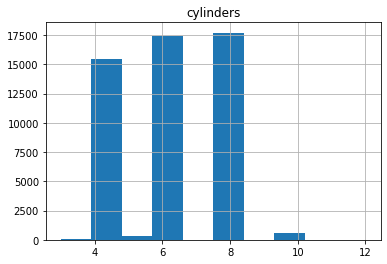

In [290]:
#cylinders
display(df.cylinders.describe().to_frame())
df.hist('cylinders')


**Tabel histogram pada price, cylinders dan odometer distribusinya lebih condong ke kanan mendekati dan banyak menumpuk di 0, yang mengartikan banyak terdapat outlier pada masing-masing kolom.**

## Mempelajari dan Menangani Outlier


**menangani outlier pada kolom price dan odometer**

In [334]:
df_stats = df.describe()

for column in columns:
    Q1 = df_stats.loc['25%', column]
    Q3 = df_stats.loc['75%', column]
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    lower_bounds.append(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    upper_bounds.append(upper_bound)

In [292]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah

df_without_outlier = df.copy()
for n, column in enumerate(columns):
    df_without_outlier = df_without_outlier[(df_without_outlier[column] >= lower_bounds[n]) & (df_without_outlier[column] <= upper_bounds[n])]
df_without_outlier.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,11,13381.000000,3


**Outlier sudah terhapus dengan membandingkan dataframe pertama dengan dataframe kedua yang berisi data tanpa outlier**

In [293]:
df.shape

(51525, 17)

In [294]:
df_without_outlier.shape

(48958, 17)

## Mempelajari Parameter Inti Tanpa Outlier

,price
count,48958.000000
mean,11190.569876
std,7823.692905
min,1.000000
25%,4999.000000
50%,8995.000000
75%,15988.000000
max,34595.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

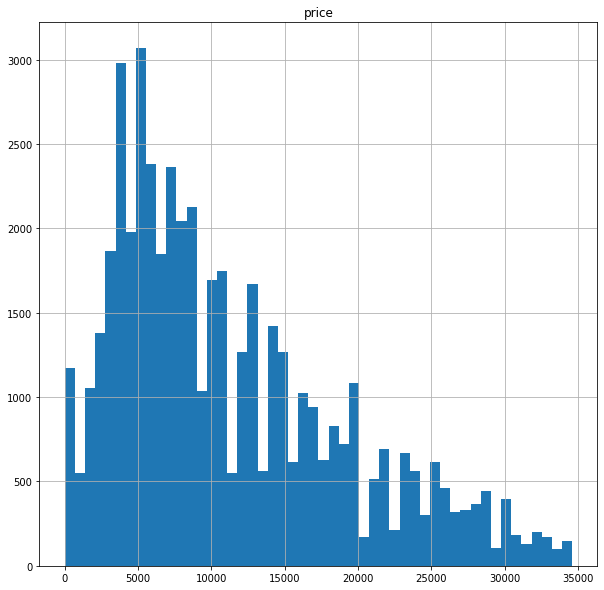

In [295]:
display(df_without_outlier.price.describe().to_frame())
df_without_outlier.hist('price', bins=50, figsize=(10,10))

,odometer
count,48958.000000
mean,113660.394134
std,53260.366848
min,0.000000
25%,78401.750000
50%,111873.000000
75%,146100.000000
max,256000.000000


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

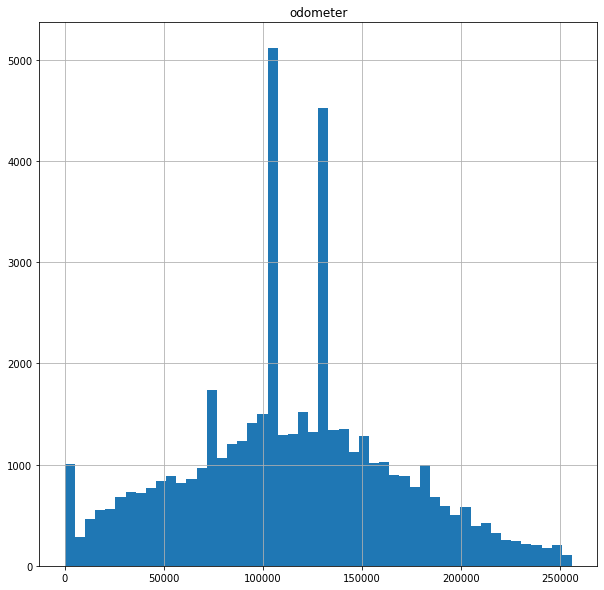

In [296]:
display(df_without_outlier.odometer.describe().to_frame())
df_without_outlier.hist('odometer', bins=50, figsize=(10,10))

,cylinders
count,48958.000000
mean,6.068957
std,1.658654
min,3.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,12.000000


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

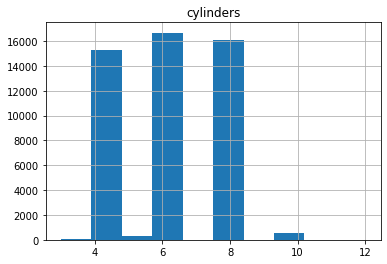

In [297]:
display(df_without_outlier.cylinders.describe().to_frame())
df_without_outlier.hist('cylinders')


**grafik histogram menjadi lebih rapih dan tidak begitu condong ke kanan**

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

In [298]:
df[['days_listed']].describe()

,days_listed
count,51525.00000
mean,39.55476
std,28.20427
min,0.00000
25%,19.00000
50%,33.00000
75%,53.00000
max,271.00000


array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

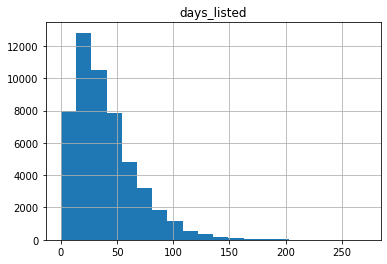

In [299]:
df[['days_listed']].hist(bins=20)

**rata-rata iklan ditayangkan selama 39 hari. iklan akan dihapus dengan cepat apabila nilainya dibawah kuantil 1 yaitu dibawah 19 hari, dan iklan ditanyangkan pada waktu yang lama apabila nilainya diatas kuantil 3 yaitu diatas 53 hari**

## Harga Rata-Rata Setiap Jenis Kendaraan

In [300]:
df_without_outlier.type.unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'convertible',
       'hatchback', 'van', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [301]:
df_without_outlier.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000,3


In [302]:
df_grouped = df_without_outlier.groupby(['type']).agg({'model' : 'count'})\
                .rename(columns= {'model' : 'jumlah_iklan'}).sort_values(by='jumlah_iklan', ascending=False)
df_grouped

,jumlah_iklan
type,
sedan,12044
SUV,11959
truck,11199
pickup,6396
coupe,2205
wagon,1502
mini-van,1141
hatchback,1031
van,582


<AxesSubplot:xlabel='type'>

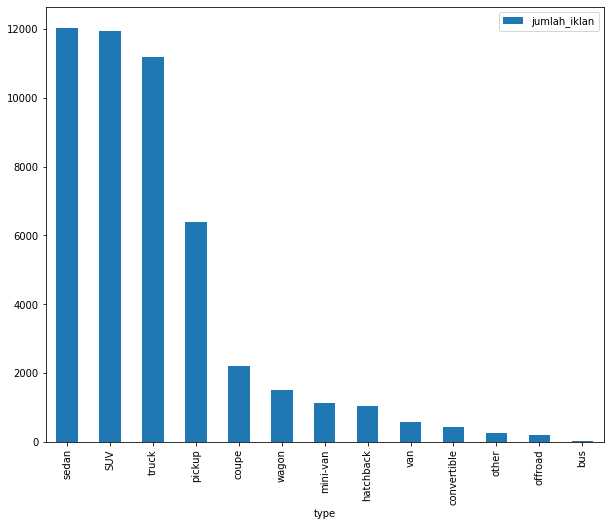

In [303]:
df_grouped.plot(kind='bar', figsize=(10,8))

In [304]:
df_grouped_mean = df_without_outlier.groupby(['type']).agg({'price' : 'mean'})\
                  .rename(columns= {'price' : 'rata-rata_harga'}).sort_values(by='rata-rata_harga', ascending=False)
df_grouped_mean

,rata-rata_harga
type,
bus,17135.666667
truck,15036.550317
pickup,14883.517667
coupe,13362.897959
offroad,13329.068966
convertible,12511.617021
other,10553.485944
SUV,10434.482900
wagon,8987.823569


<AxesSubplot:xlabel='type'>

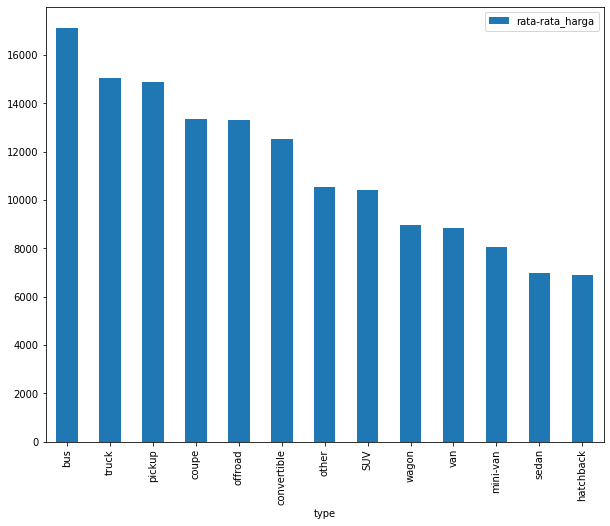

In [305]:
df_grouped_mean.plot(kind='bar', figsize=(10,8))

**jumlah iklan terbanyak yaitu pada mobil jenis sedan dan SUV, kita akan melakukan analisi pada ke2 jenis mobil tersebut**

## Faktor Harga

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

**menganalisa jumlah iklan yang paling banyak = sedan dan SUV**

**mencari tahu apakah usia, jarak tempuh, kondisi, tipe transimi dan warna pada kendaraan mempengaruhi harga kendaraan dengan cara membuat grafik pada setiap parameter yang telah disebutkan tadi agar lebih mudah untuk dibaca.**

In [306]:
#analisa untuk sedan

In [307]:
df_sedan = df_without_outlier[df_without_outlier['type'] == 'sedan']
df_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,6,18333.333333,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,3,26404.000000,3
11,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,2019,7,15877.428571,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,5,27914.600000,2


In [308]:
df_without_outlier.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [309]:
df_sedan.transmission.value_counts()

automatic    11330
manual         582
other          132
Name: transmission, dtype: int64

In [310]:
df_sedan_transmission = df_sedan.groupby('transmission').agg({'model' : 'count'})\
                        .rename(columns=({'model':'iklan'}))\
                        .sort_values(by='iklan', ascending=False)\
                        .query('iklan > 50')
df_sedan_transmission

,iklan
transmission,
automatic,11330
manual,582
other,132


**semua transmission > 50 kita bisa membuat plot**

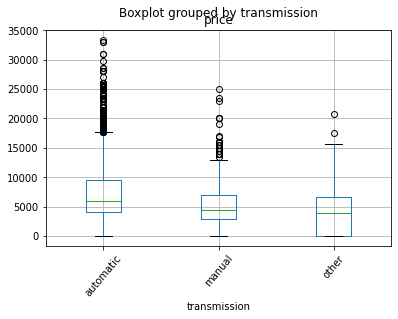

In [311]:
df_sedan.boxplot('price', by='transmission')
plt.xticks(rotation=50)
plt.show()

**jenis mobil sedan dengan transmisi jenis automatic mediannya lebih tinggi dibandingkan yang manual, hal ini mungkin karena mobil automatic lebih canggih sehingga spare part mobil lebih banyak dibandingkan mobil manual.**

In [312]:
df_sedan.paint_color.value_counts()

unknown    2169
silver     2035
black      1760
grey       1609
white      1493
blue       1226
red         939
custom      300
brown       254
green       205
purple       23
yellow       22
orange        9
Name: paint_color, dtype: int64

**mengabaikan color purple, yellow dan orange karena hanya sedikit**

In [313]:
df_sedan_color_boxplot= df_sedan.loc[~df_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
df_sedan_color_boxplot.paint_color.value_counts()

unknown    2169
silver     2035
black      1760
grey       1609
white      1493
blue       1226
red         939
custom      300
brown       254
green       205
Name: paint_color, dtype: int64

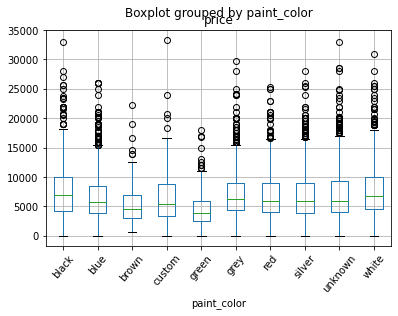

In [314]:
df_sedan_color_boxplot.boxplot('price', by='paint_color')
plt.xticks(rotation=50)
plt.show()

**mobil sedan dengan warna hitam dan putih lebih tinggi harganya dibanding warna lain karena warna hitam dan putih lebih banyak diinginkan dipasaran dari pada warna lainnya sehingga membuat harga mobil menjadi lebih tinggi** 

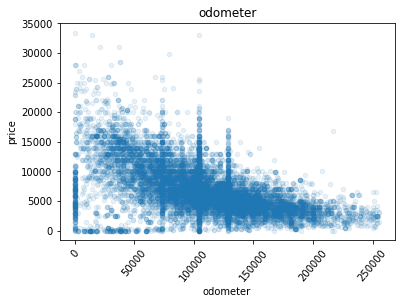

In [315]:
#scatterplot untuk data numerik : odometer

df_sedan.plot(x='odometer', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('odometer')
plt.show()

**semakin besar odometer/kilometer maka harga semakin turun. odometer berpengaruh terhadap harga**

In [316]:
#bisa gunakan corr() untuk melihat kolerasinya
df_sedan.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,age,avg_mileage,condition_numeric
price,1.000000,0.566236,-0.039395,-0.520297,0.040340,0.000953,0.016734,-0.559787,0.302463,0.293126
model_year,0.566236,1.000000,-0.149663,-0.507988,0.068931,-0.003910,0.013319,-0.994948,0.498990,0.284771
cylinders,-0.039395,-0.149663,1.000000,0.067633,0.218955,0.003569,0.002320,0.151890,-0.076953,-0.053440
odometer,-0.520297,-0.507988,0.067633,1.000000,-0.051410,0.009050,-0.010545,0.500718,0.069141,-0.358891
is_4wd,0.040340,0.068931,0.218955,-0.051410,1.000000,0.005019,-0.003396,-0.066226,0.023691,0.014183
days_listed,0.000953,-0.003910,0.003569,0.009050,0.005019,1.000000,0.013697,0.005424,0.003326,-0.010211
year_posted,0.016734,0.013319,0.002320,-0.010545,-0.003396,0.013697,1.000000,0.080759,-0.123083,0.015720
age,-0.559787,-0.994948,0.151890,0.500718,-0.066226,0.005424,0.080759,1.000000,-0.506783,-0.279676
avg_mileage,0.302463,0.498990,-0.076953,0.069141,0.023691,0.003326,-0.123083,-0.506783,1.000000,0.059655
condition_numeric,0.293126,0.284771,-0.053440,-0.358891,0.014183,-0.010211,0.015720,-0.279676,0.059655,1.000000


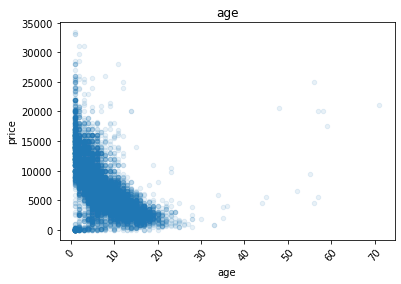

In [317]:
#scatterplot untuk data numerik : age
df_sedan.plot(x='age', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('age')
plt.show()

**semakin tua umur mobil maka semakin turun harganya**

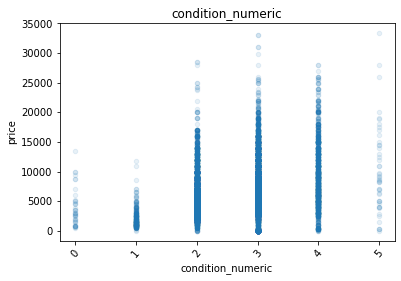

In [318]:
#scatterplot untuk data numerik : condition
df_sedan.plot(x='condition_numeric', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('condition_numeric')
plt.show()

**terlihat bahwa mobil jenis sedan pada kondisi 2, 3 dan 4 datanya paling banyak dengan harga yang bervariatif**

In [319]:
#Jenis mobil SUV

In [320]:
df_suv = df_without_outlier[df_without_outlier['type'] == 'SUV']
df_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,age,avg_mileage,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,7,20714.285714,2
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,11,13381.000000,3
14,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,2019,10,13228.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500,automatic,SUV,unknown,True,2019-03-05,1,2019,7,20642.857143,2
51496,4999,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unknown,True,2018-05-26,59,2018,16,11118.812500,3
51500,6995,2012,buick enclave,excellent,6,gas,157000,automatic,SUV,white,True,2018-08-04,17,2018,6,26166.666667,3
51502,7995,2011,chevrolet equinox,like new,4,gas,111088,automatic,SUV,unknown,False,2019-04-01,175,2019,8,13886.000000,4


In [321]:
df_suv.transmission.value_counts()

automatic    11310
manual         491
other          158
Name: transmission, dtype: int64

In [322]:
df_suv_transmission = df_suv.groupby('transmission').agg({'model' : 'count'})\
                        .rename(columns=({'model':'iklan'}))\
                        .sort_values(by='iklan', ascending=False)\
                        .query('iklan > 50')
df_suv_transmission

,iklan
transmission,
automatic,11310
manual,491
other,158


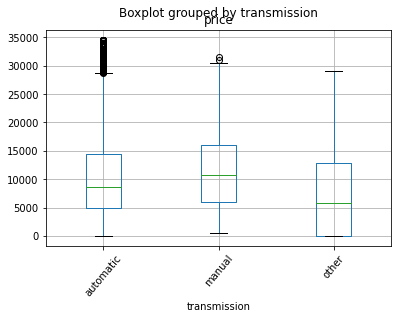

In [323]:
df_suv.boxplot('price', by='transmission')
plt.xticks(rotation=50)
plt.show()

**jenis mobil SUV dengan transmisi jenis manual mediannya lebih tinggi dibandingkan yang automaic**

In [324]:
df_suv.paint_color.value_counts()

unknown    2156
black      2100
white      1882
silver     1531
grey       1151
blue       1024
red         882
green       416
brown       352
custom      299
orange       81
yellow       47
purple       38
Name: paint_color, dtype: int64

**warna orange, yellow dan purple diabaikan karena hanya sedikit, hal ini tidak akan mempengaruhi pada proses analisis**

In [325]:
#mengabaikan color purple, yellow dan orange karena hanya sedikit
df_suv_color_boxplot= df_suv.loc[~df_suv['paint_color'].isin(['purple', 'yellow', 'orange'])]
df_suv_color_boxplot.paint_color.value_counts()

unknown    2156
black      2100
white      1882
silver     1531
grey       1151
blue       1024
red         882
green       416
brown       352
custom      299
Name: paint_color, dtype: int64

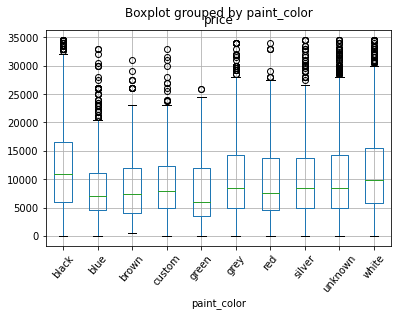

In [326]:
df_suv_color_boxplot.boxplot('price', by='paint_color')
plt.xticks(rotation=50)
plt.show()

**mobil suv dengan warna hitam dan putih lebih tinggi harganya dibanding warna lain karena warna hitam dan putih lebih banyak diinginkan dipasaran dari pada warna lainnya sehingga membuat harga mobil menjadi lebih tinggi** 

In [327]:
df_suv.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,age,avg_mileage,condition_numeric
price,1.000000,0.542789,0.001937,-0.485307,0.111126,-0.020763,-0.000763,-0.542219,0.274380,0.264968
model_year,0.542789,1.000000,-0.274842,-0.520340,-0.070196,-0.013647,0.010430,-0.995825,0.520586,0.304594
cylinders,0.001937,-0.274842,1.000000,0.214956,0.122732,0.014800,-0.002576,0.273971,-0.166224,-0.097497
odometer,-0.485307,-0.520340,0.214956,1.000000,0.030194,0.013781,-0.007804,0.513592,0.014979,-0.351855
is_4wd,0.111126,-0.070196,0.122732,0.030194,1.000000,-0.006488,-0.006492,0.069329,-0.032174,-0.014326
days_listed,-0.020763,-0.013647,0.014800,0.013781,-0.006488,1.000000,-0.000100,0.013229,-0.013437,-0.013379
year_posted,-0.000763,0.010430,-0.002576,-0.007804,-0.006492,-0.000100,1.000000,0.075554,-0.106523,-0.002814
age,-0.542219,-0.995825,0.273971,0.513592,0.069329,0.013229,0.075554,1.000000,-0.526827,-0.302407
avg_mileage,0.274380,0.520586,-0.166224,0.014979,-0.032174,-0.013437,-0.106523,-0.526827,1.000000,0.065256
condition_numeric,0.264968,0.304594,-0.097497,-0.351855,-0.014326,-0.013379,-0.002814,-0.302407,0.065256,1.000000


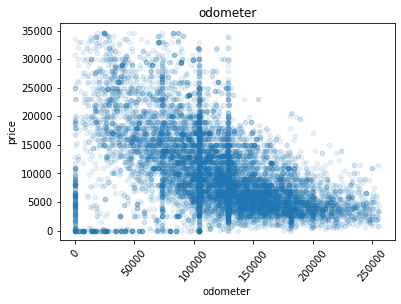

In [328]:
#scatterplot untuk data numerik : odometer

df_suv.plot(x='odometer', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('odometer')
plt.show()

**semakin tua umur mobil maka semakin turun harganya**

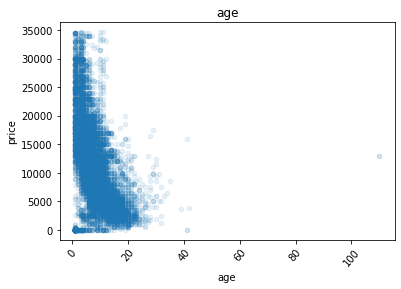

In [329]:
#scatterplot untuk data numerik : age
df_suv.plot(x='age', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('age')
plt.show()

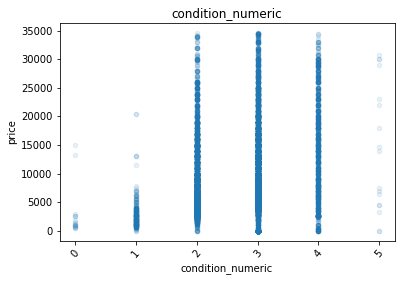

In [330]:
#scatterplot untuk data numerik : condition
df_suv.plot(x='condition_numeric', y='price', kind='scatter', alpha = 0.1, ax = plt.subplot(1,1,1))
plt.xticks(rotation= 50)
plt.title('condition_numeric')
plt.show()

**terlihat bahwa mobil jenis SUV pada kondisi 2, 3 dan 4 datanya paling banyak dengan harga yang bervariatif**

## Kesimpulan Umum

**Pada proses penganalisisan data diawali dengan memuat data dengan mengimport pandas dan matplotlib. kemudian mengeksplorasi data awal untuk melihat apakah ada data yang aneh atau data yang hilang, setelah dilihat informasi dari data tersebut terdapat NaN dan tipe data yang tidak sesuai.Oleh karena itu nilai-nilai yang hilang perlu diatasi dan perbaiki tipe data. Setelah NaN dan data diperbaiki langkah selanjutnya yaiu mencari parameter yang mempengaruhi harga kendaraan dan mempelajari parameter intinya. Menangani outlier, Mencari masa berlaku iklan, Menghitung harga rata-rata setiap jenis kendaraan, Mencari faktor-faktor yang mempengaruhi harga.**

**Berdasarkan hasil analisis yang telah dilakukan bahwa harga mobil pada iklan kendaraan dari salah satu situs web bergantung pada usia kendaraan karena semakin tua umur kendaraan maka harganya semakin rendah karena performa kedaraan akan semakin menurun, jarak tempuh kendaraan pun mempengaruh harga kendaraan karena jika semakin tinggi odometer maka harganya pun akan semakin rendah. Kendaraan dengan kondisi fair dan salvage harganya cenderung rendah. kendaraan mobil dengan warna hitam dan putih harganya lebih tinggi dibandingkan warna lainnya hal ini karena warna putih dan hitam lebih banyak diminati sehingga jika minat kepada suatu barang tinggi maka hargapun biasanya ikut tinggi. tipe transmisi tidak begitu mempengaruhi tingginya harga kendaran hal ini bergantung kepada jenis dari kendaraannya.
Maka dapat ditarik kesimpulan bahwa harga kendaraan bergantung kepada umur kendaraan, odometer, kondisi, dan warna kendaraan.**